In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Smote and Counter - change if using/need a new dataset balancing technique.
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Creditcard_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [ ]:
class_distribution = df['Class'].value_counts()
print("Values:\n{}".format(class_distribution))

Values:
0    763
1      9
Name: Class, dtype: int64


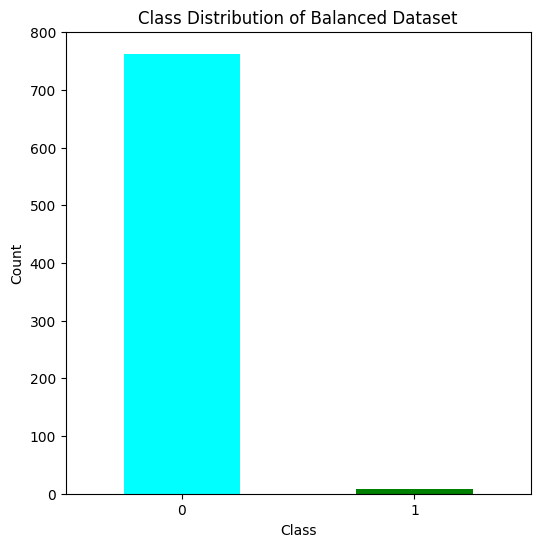

In [ ]:
# Graph for imbalanced dataset
plt.figure(figsize=(6, 6))
df['Class'].value_counts().plot(kind='bar', color=['cyan', 'green'])
plt.title('Class Distribution of Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Balancing classes using Synthetic Minority Oversampling Technique (SMOTE)**

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [ ]:
## Recombine the balanced dataset
x_resampled_df = pd.DataFrame(x_smote, columns=x.columns)
y_resampled_df = pd.Series(y_smote, name='Class')

balanced_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [ ]:
balanced_class_distribution = balanced_df['Class'].value_counts()
print("Values:\n{}".format(balanced_class_distribution))
balanced_df.head()

Values:
0    763
1    763
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


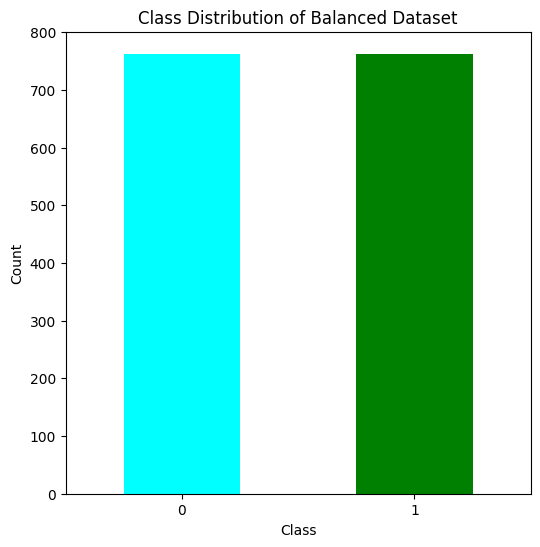

In [ ]:
# Graph for balanced dataset
plt.figure(figsize=(6, 6))
balanced_df['Class'].value_counts().plot(kind='bar', color=['cyan', 'green'])
plt.title('Class Distribution of Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

###**Sampling the balanced dataset using different techniques**




In [ ]:
# 1. Simple Random Sampling

# Sample size n = (Z^2 * p * (1-p)/E^2)
n_simple_random = int(np.ceil((1.96**2 * 0.5 * (1 - 0.5)) / 0.05**2))
class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_simple_random = min(n_simple_random, class_size)

sample_simple_random = balanced_df.sample(n=n_simple_random, random_state=42)

print("Sample Size for Simple Random Sampling:", sample_simple_random.shape[0])
print(sample_simple_random['Class'].value_counts())


Sample Size for Simple Random Sampling: 385
1    207
0    178
Name: Class, dtype: int64


In [ ]:
# 2. Stratified Sampling

#  Sample size n = (Z**2 * p * (1 - p)) / (E/S)**2)
#S is no of strata, S=2 bcz of the two classes, p = Estimated proportion
p = 0.5
n_stratified = int(np.ceil((1.96**2 * 0.5 * (1 - 0.5)) / (0.05/2)**2))

class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_stratified = min(n_stratified, class_size)

sample_stratified = pd.DataFrame()
for class_label in balanced_df['Class'].unique():
    class_samples = balanced_df[balanced_df['Class'] == class_label]
    sample_size_per_class = int(np.ceil((len(class_samples) / len(balanced_df)) * n_stratified))
    class_sample = class_samples.sample(n=sample_size_per_class, random_state=42)
    sample_stratified = pd.concat([sample_stratified, class_sample])

print("Sample Size for Stratified Sampling:", sample_stratified.shape[0])
print(sample_stratified['Class'].value_counts())

Sample Size for Stratified Sampling: 764
0    382
1    382
Name: Class, dtype: int64


In [ ]:
# 3. Cluster Sampling

# Sample size n = (Z**2 * p * (1 - p)) / (E / C)**2
#Here, C = avg size of cluster
C = 50
Z=1.96
p=0.5
E=0.05
n_cluster = int(np.ceil((Z**2 * p * (1 - p)) / (E / C)**2))

class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_cluster = min(n_cluster, class_size)

sample_cluster = pd.DataFrame()
cluster_indices = np.array_split(balanced_df.index, n_cluster)
for cluster_index in cluster_indices:
    cluster_sample = balanced_df.loc[cluster_index].sample(random_state=42)
    sample_cluster = pd.concat([sample_cluster, cluster_sample])

print("Sample Size for Cluster Sampling:", sample_cluster.shape[0])
print(sample_cluster['Class'].value_counts())

Sample Size for Cluster Sampling: 763
1    383
0    380
Name: Class, dtype: int64


In [ ]:
# 4. Systematic Sampling

k = len(balanced_df) // 1000
n_systematic = len(balanced_df) // k
sample_systematic = balanced_df.iloc[::k]

print("Sample Size for Systematic Sampling:", sample_systematic.shape[0])
print(sample_systematic['Class'].value_counts())

Sample Size for Systematic Sampling: 1526
0    763
1    763
Name: Class, dtype: int64


In [ ]:
# 5. Boostrap Sampling

np.random.seed(50)
n_bootstrap = len(balanced_df)
sample_bootstrap = resample(balanced_df, replace=True, n_samples=n_bootstrap, random_state=42)
print("Sample Size for Bootstrap Sampling:", sample_bootstrap.shape[0])
print(sample_bootstrap['Class'].value_counts())

Sample Size for Bootstrap Sampling: 1526
1    811
0    715
Name: Class, dtype: int64


In [ ]:
# Decision Tree Classifier

## Simple Random
decision_tree = DecisionTreeClassifier(random_state=42)
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_simplerandom = decision_tree.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with Decision Tree:", accuracy_simple_random_test)

## Stratified Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_stratified = decision_tree.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with Decision Tree:", accuracy_stratified_test)

## Boostrap Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_bootstrap = decision_tree.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with Decision Tree:", accuracy_bootstrap_test)

## Systematic Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_systematic = decision_tree.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with Decision Tree:", accuracy_systematic_test)

## Cluster Sampling
decision_tree = DecisionTreeClassifier(random_state=42)
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test_cluster = decision_tree.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with Decision Tree:", accuracy_cluster_test)

model1 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]


Accuracy for Simple Random Sampling with Decision Tree: 0.9415584415584416
Accuracy for Stratified Sampling with Decision Tree: 0.9640522875816994
Accuracy for Bootstrap Sampling with Decision Tree: 0.9885433715220949
Accuracy for Systematic Sampling with Decision Tree: 0.9754500818330606
Accuracy for Cluster Sampling with Decision Tree: 0.9771241830065359


In [ ]:
# Random Forest Classifier

## Simple Random
random_forest = RandomForestClassifier(random_state=42)
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_simplerandom = random_forest.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with Random Forest:", accuracy_simple_random_test)

## Stratified Sampling
random_forest = RandomForestClassifier(random_state=42)
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_stratified = random_forest.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with Random Forest:", accuracy_stratified_test)

## Boostrap Sampling
random_forest = RandomForestClassifier(random_state=42)
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_bootstrap = random_forest.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with Random Forest:", accuracy_bootstrap_test)

## Systematic Sampling
random_forest = RandomForestClassifier(random_state=42)
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_systematic = random_forest.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with Random Forest:", accuracy_systematic_test)

## Cluster Sampling
random_forest = RandomForestClassifier(random_state=42)
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test_cluster = random_forest.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with Random Forest:", accuracy_cluster_test)

model2 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]

Accuracy for Simple Random Sampling with Random Forest: 0.9675324675324676
Accuracy for Stratified Sampling with Random Forest: 0.9967320261437909
Accuracy for Bootstrap Sampling with Random Forest: 0.9983633387888707
Accuracy for Systematic Sampling with Random Forest: 0.9934533551554828
Accuracy for Cluster Sampling with Random Forest: 0.9967320261437909


In [ ]:
# SVM
svm=SVC(kernel='linear')
## Simple Random
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_simplerandom = svm.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with SVM:", accuracy_simple_random_test)

## Stratified Sampling
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_stratified = svm.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with SVM:", accuracy_stratified_test)

## Boostrap Sampling
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_bootstrap = svm.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with SVM:", accuracy_bootstrap_test)

## Systematic Sampling
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_systematic = svm.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with SVM:", accuracy_systematic_test)

## Cluster Sampling
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
svm.fit(X_train, y_train)
y_pred_test_cluster = svm.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with SVM:", accuracy_cluster_test)

model3 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]

Accuracy for Simple Random Sampling with SVM: 0.8896103896103896
Accuracy for Stratified Sampling with SVM: 0.8986928104575164
Accuracy for Bootstrap Sampling with SVM: 0.9607201309328969
Accuracy for Systematic Sampling with SVM: 0.9263502454991817
Accuracy for Cluster Sampling with SVM: 0.9607843137254902


In [ ]:
# K- Nearest Neighbour
knn=KNeighborsClassifier(n_neighbors=5)
## Simple Random
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_simplerandom = knn.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with K- Nearest Neighbour:", accuracy_simple_random_test)

## Stratified Sampling
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_stratified = knn.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with K- Nearest Neighbour:", accuracy_stratified_test)

## Boostrap Sampling
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_bootstrap = knn.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with K- Nearest Neighbour:", accuracy_bootstrap_test)

## Systematic Sampling
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_systematic = knn.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with K- Nearest Neighbour:", accuracy_systematic_test)

## Cluster Sampling
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred_test_cluster = knn.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with K- Nearest Neighbour:", accuracy_cluster_test)

model4 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]

Accuracy for Simple Random Sampling with K- Nearest Neighbour: 0.7857142857142857
Accuracy for Stratified Sampling with K- Nearest Neighbour: 0.8071895424836601
Accuracy for Bootstrap Sampling with K- Nearest Neighbour: 0.8690671031096563
Accuracy for Systematic Sampling with K- Nearest Neighbour: 0.8330605564648118
Accuracy for Cluster Sampling with K- Nearest Neighbour: 0.7647058823529411


In [ ]:
# XGBoost Classifier
xgb=XGBClassifier()
## Simple Random
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_simplerandom = xgb.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test_simplerandom)
print("Accuracy for Simple Random Sampling with XGBoost:", accuracy_simple_random_test)

## Stratified Sampling
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_stratified = xgb.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test_stratified)
print("Accuracy for Stratified Sampling with XGBoost:", accuracy_stratified_test)

## Boostrap Sampling
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_bootstrap = xgb.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test_bootstrap)
print("Accuracy for Bootstrap Sampling with XGBoost:", accuracy_bootstrap_test)

## Systematic Sampling
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_systematic = xgb.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test_systematic)
print("Accuracy for Systematic Sampling with XGBoost:", accuracy_systematic_test)

## Cluster Sampling
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
xgb.fit(X_train, y_train)
y_pred_test_cluster = xgb.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test_cluster)
print("Accuracy for Cluster Sampling with XGBoost:", accuracy_cluster_test)

model5 = [accuracy_simple_random_test * 100, accuracy_stratified_test * 100, accuracy_bootstrap_test * 100, accuracy_systematic_test * 100, accuracy_cluster_test * 100]

Accuracy for Simple Random Sampling with XGBoost: 0.9415584415584416
Accuracy for Stratified Sampling with XGBoost: 0.9803921568627451
Accuracy for Bootstrap Sampling with XGBoost: 0.9983633387888707
Accuracy for Systematic Sampling with XGBoost: 0.983633387888707
Accuracy for Cluster Sampling with XGBoost: 0.9869281045751634


In [ ]:
models = ["Decision Tree","Random Forest","SVM","KNN","XGBoost"]

In [ ]:
Sampling=["Simple Random Sampling", "Stratified Sampling", "Bootstrap Sampling", "Systematic Sampling", "Cluster Sampling"]

In [144]:
final_table = pd.DataFrame()
final_table['Sampling Technique -> // Model ↓'] = Sampling
final_table['Decision Tree'] = model1
final_table['Random Forest'] = model2
final_table['SVM'] = model3
final_table['KNN'] = model4
final_table['XGBoost'] = model5
final_table = final_table.transpose()

In [150]:
final_table.head(6)

,0,1,2,3,4
Sampling Technique -> // Model ↓,Simple Random Sampling,Stratified Sampling,Bootstrap Sampling,Systematic Sampling,Cluster Sampling
Decision Tree,94.155844,96.405229,98.854337,97.545008,97.712418
Random Forest,96.753247,99.673203,99.836334,99.345336,99.673203
SVM,88.961039,89.869281,96.072013,92.635025,96.078431
KNN,78.571429,80.718954,86.90671,83.306056,76.470588
XGBoost,94.155844,98.039216,99.836334,98.363339,98.69281
